In [136]:
import os
measuring_root = r"/Users/jesse/Thesis/Code"
data_root = r"/Users/jesse/Thesis/Data/Delay module/qtlab"

execfile(os.path.join(measuring_root, "analysis", "scripts", "setup_analysis.py"))
%matplotlib inline
import matplotlib as mpl
mpl.style.use('classic')
# mpl.rc("savefig", dpi=100)

In [181]:
figure_stash = r"/Users/jesse/Thesis/Report/figures/results/delay-module"

def savefig(filename):
    if True:
        plt.tight_layout()
        plt.savefig(os.path.join(figure_stash, filename + ".png"), dpi=300)
        plt.savefig(os.path.join(figure_stash, filename + ".pdf"))
        plt.savefig(os.path.join(figure_stash, filename + ".pgf"))

# Ramsey plot

In [138]:
ssro_folder_ramsey_baseline = os.path.join(data_root, "20170214", "140807_AdwinSSRO_SSROCalibration_111no2_SIL2")
data_folder_ramsey_baseline = os.path.join(data_root, "20170214", "145713_GeneralElectronRamsey_111no2_SIL2")

ssro_folder_ramsey_delayed = os.path.join(data_root, "20170214", "152459_AdwinSSRO_SSROCalibration_111no2_SIL2")
data_folder_ramsey_delayed = os.path.join(data_root, "20170214", "152142_GeneralElectronRamsey_111no2_SIL2")

SSRO calibration :  20170214/140807
max. F = (96.78 +/- 0.35)% at t=10 us
	ms_0 = (95.12 +/- 0.30)%
	ms_1 = (98.44 +/- 0.18)%


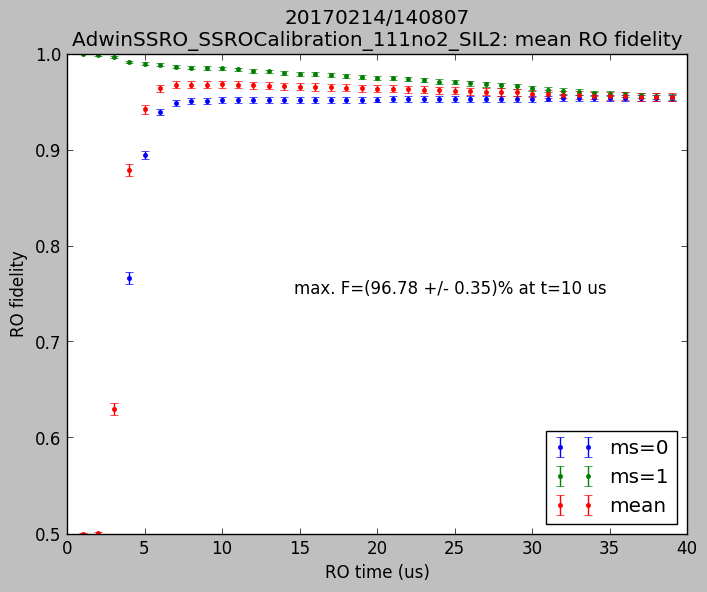

In [139]:
# ssro calibration for baseline ramsey sweep

reload(ssro)
ssro.ssrocalib(folder = ssro_folder_ramsey_baseline, plot_photon_ms0=False)

In [140]:
from analysis.scripts.espin import electron_ramsey_analysis as e_ramsey; 
reload(e_ramsey)
from analysis.lib.fitting import fit, ramsey; reload(ramsey)
# e_ramsey.fit_Ramsey_6_cos_hf_fixed(None,ssro_folder_ramsey_baseline, 5000, 0.5, 0.5, 0.00005, 0.0022, 0.00020, folder=data_folder_ramsey_baseline)

def fit_Ramsey_6_cos_hf_fixed(timestamp,ssro_calib_folder,g_tau, g_A, g_a,g_det,g_hf_N,g_hf_C,fixed=[], folder=None, do_fit=True):
    a = sequence.SequenceAnalysis(folder)
    a.get_sweep_pts()
    a.get_readout_results(name='ssro')
    if ssro_calib_folder != None:
        a.get_electron_ROC(ssro_calib_folder = ssro_calib_folder)
    else: 
        a.get_electron_ROC()

    # Plot data
    ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')

    if do_fit:
        p0, fitfunc_0, fitfunc_str_0 = ramsey.fit_ramsey_hyperfinelines_fixed_6cos(g_tau, g_A, g_a,g_det,g_hf_N,g_hf_C)


        fit_result = fit.fit1d(a.sweep_pts, a.p0.reshape(-1), ramsey.fit_ramsey_hyperfinelines_fixed_6cos,
               g_tau, g_A, g_a,g_det,g_hf_N,g_hf_C, fixed = fixed, 
                do_print=True, ret=True)
        if fit_result != False :
            plot.plot_fit1d(fit_result, np.linspace(0,a.sweep_pts[-1],201), ax=ax,
                            plot_data=False, add_txt=False)
        return fit_result

Converged with chi squared  0.0286619200764
degrees of freedom, dof  93
RMS of residuals (i.e. sqrt(chisq/dof))  0.0175554176536
Reduced chisq (i.e. variance of residuals)  0.000308192688994

fitted parameters at minimum, with 68% C.I.:
 0 tau         3205.189722 +/- 260316.516475
 1 A              0.520683 +/-   0.018995
 2 a              0.495625 +/-   0.001948
 3 det            0.000002 +/-   0.249694
 4 hf_N           0.002201 +/-   0.000002
 5 hf_C           0.000187 +/-   0.000001

correlation matrix:
               tau       A         a         det       hf_N      hf_C      
       tau  1.000000
         A -0.534702  1.000000
         a  0.361352 -0.163362  1.000000
       det  1.000000 -0.534489  0.361320  1.000000
      hf_N -0.366941  0.205890 -0.132737 -0.366938  1.000000
      hf_C -0.453268  0.195102 -0.139631 -0.453278  0.165259  1.000000



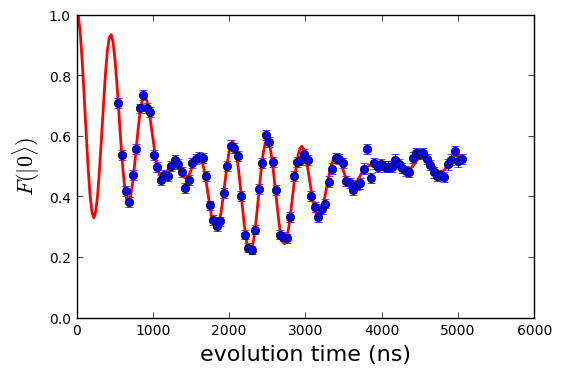

In [186]:
ramsey_fit = fit_Ramsey_6_cos_hf_fixed(None,ssro_folder_ramsey_baseline, 5000, 0.5, 0.5, 0.00005, 0.0022, 0.00020, folder=data_folder_ramsey_baseline)



plt.ylim(0.0,1.0)
plt.ylabel(r"$F(|0\rangle)$", fontsize=16)
plt.xlabel(r"evolution time (ns)", fontsize=16)
plt.title("")

savefig("ramsey-awg-baseline")

In [142]:
baseline_fringes = ramsey_fit['fitfunc']

def get_fitfunc_shifted_fringes(g_delta_tau):
    global baseline_fringes
    delta_tau = fit.Parameter(g_delta_tau, 'delta_tau')
    
    p0 = [delta_tau]
    fitfunc_str = "shifted ramsey fringes"
    
    def fitfunc(x):
        return baseline_fringes(x + delta_tau())
    
    return p0, fitfunc, fitfunc_str

def fit_Ramsey_shifted(timestamp,ssro_calib_folder,g_delta_tau, fixed=[], folder=None, do_fit=True):
    a = sequence.SequenceAnalysis(folder)
    a.get_sweep_pts()
    a.get_readout_results(name='ssro')
    if ssro_calib_folder != None:
        a.get_electron_ROC(ssro_calib_folder = ssro_calib_folder)
    else: 
        a.get_electron_ROC()

    # Plot data
    ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')

    if do_fit:
        p0, fitfunc_0, fitfunc_str_0 = get_fitfunc_shifted_fringes(g_delta_tau)


        fit_result = fit.fit1d(a.sweep_pts, a.p0.reshape(-1), get_fitfunc_shifted_fringes,
               g_delta_tau, fixed = fixed, 
                do_print=True, ret=True)
        if fit_result != False :
            plot.plot_fit1d(fit_result, np.linspace(0,a.sweep_pts[-1],201), ax=ax,
                            plot_data=False, add_txt=False)
        return fit_result

Converged with chi squared  0.0349121175751
degrees of freedom, dof  98
RMS of residuals (i.e. sqrt(chisq/dof))  0.0188744827136
Reduced chisq (i.e. variance of residuals)  0.000356246097705

fitted parameters at minimum, with 68% C.I.:
 0 delta_tau    783.439337 +/-   1.956468

correlation matrix:
               delta_tau 
 delta_tau  1.000000



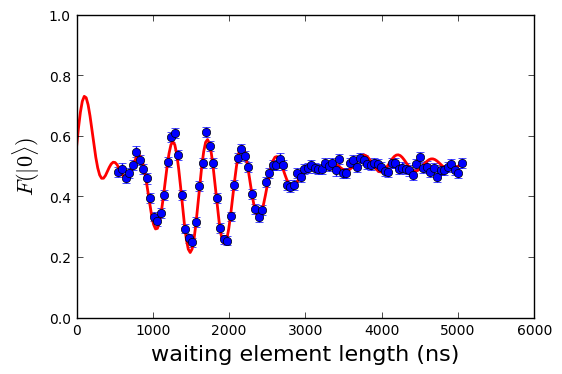

In [185]:
#fit_Ramsey_6_cos_hf_fixed(None,ssro_folder_ramsey_delayed, 5000, 0.5, 0.5, 0.00005, 0.0022, 0.00020,
#                          folder=data_folder_ramsey_delayed, do_fit=False)

fit_Ramsey_shifted(None, ssro_folder_ramsey_delayed, 1000, folder=data_folder_ramsey_delayed)

plt.ylim(0.0,1.0)
plt.title("")
plt.ylabel(r"$F(|0\rangle)$", fontsize=16)
plt.xlabel("waiting element length (ns)", fontsize=16)

savefig("ramsey-delay-shifted-fringes")

# CPLD calibration plot

In [144]:
%matplotlib inline

#datadir = r'D:\measuring\analysis_data\delayline'
#ssro_calib_folder = r'D:\measuring\analysis_data\delayline\20170224\120011_SSRO_calib_MWInit_Pippin_SIL3_SSROCalibration_MWInit'

cpld_calib_ssro_folder = os.path.join(data_root, "20170224", "120011_SSRO_calib_MWInit_Pippin_SIL3_SSROCalibration_MWInit")

['/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/120736_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/121018_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/121303_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/121539_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/121829_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/122129_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/122409_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/122653_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', '/Users/jesse/Thesis/Data/Delay module/qtlab/20170224/122940_ElectronRefocussin

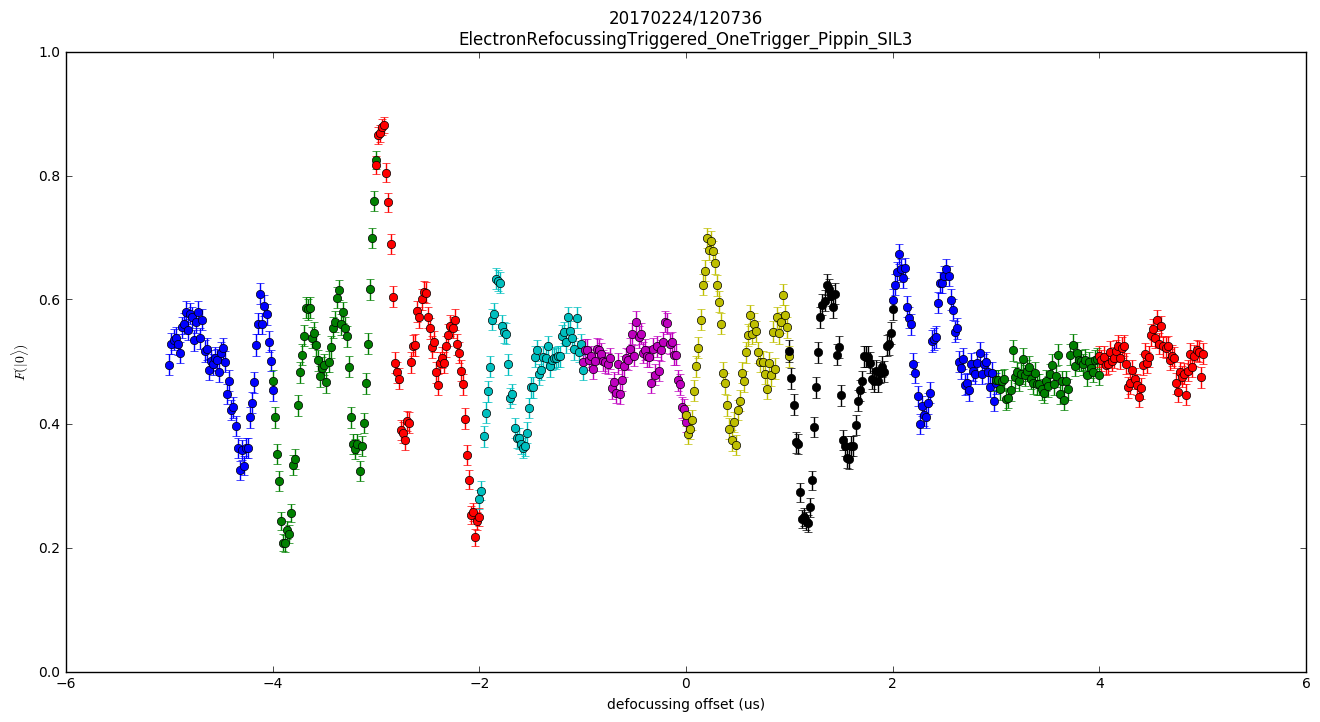

In [145]:
### stitched

num_msmts = 10
msmt_folders = []

prev_timestamp = r"20170227000000"

for i in range(num_msmts):
    next_folder = tb.latest_data('ElectronRefocussingTriggered_OneTrigger', folder=data_root, older_than=prev_timestamp)
    prev_timestamp = "".join(tb.get_date_time_string_from_folder(next_folder))
    
    msmt_folders.insert(0, next_folder)

print(msmt_folders)

ax = None

stitched_DELAYT_sweep_pts = list()
stitched_DELAYT_p0 = list()
stitched_DELAYT_u_p0 = list()

for folder in msmt_folders:
    a = sequence.SequenceAnalysis(folder)
    a.get_sweep_pts()
    a.get_readout_results(name='ssro')
    a.get_electron_ROC(ssro_calib_folder=cpld_calib_ssro_folder)
    ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro', ax=ax)
    
    stitched_DELAYT_sweep_pts += a.sweep_pts.tolist()
    stitched_DELAYT_p0 += a.p0.tolist()
    stitched_DELAYT_u_p0 += a.u_p0.tolist()
    
stitched_DELAYT_sweep_pts = np.array(stitched_DELAYT_sweep_pts)
stitched_DELAYT_p0 = np.array(stitched_DELAYT_p0)
stitched_DELAYT_u_p0 = np.array(stitched_DELAYT_u_p0)

ax.set_ylim(0.0,1.0)
plt.gcf().set_size_inches(16,8)

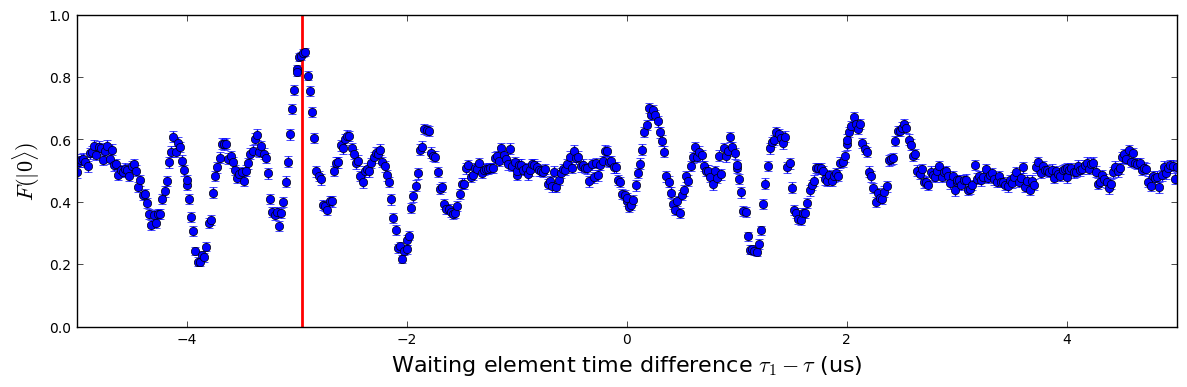

In [184]:
plt.figure(figsize=(12,4), facecolor='white')
ax = plt.gca()

ax.errorbar(stitched_DELAYT_sweep_pts, stitched_DELAYT_p0, yerr=stitched_DELAYT_u_p0, fmt='o')
ax.set_ylabel(r'$F(|0\rangle)$', fontsize=16)
ax.set_xlabel(r"Waiting element time difference $\tau_1 - \tau$ (us)", fontsize=16)

ax.set_ylim(0.0, 1.0)
ax.set_xlim(-5, 5)

plt.axvline(x=-2.95, color="r", linewidth=2)

plt.tight_layout()

savefig("calibration-fixed-cpld-delay")

# CPLD Hahn plot

In [147]:
cpld_hahn_ssro_folder = os.path.join(data_root, "20170227", "165224_SSRO_calib_MWInit_Pippin_SIL3_SSROCalibration_MWInit")
cpld_hahn_0t_data_folder = os.path.join(data_root, "20170227", "172450_ElectronRefocussingTriggered_HahnEchoNoTrigger_Pippin_SIL3")
cpld_hahn_2t_data_folder = os.path.join(data_root, "20170227", "173059_ElectronRefocussingTriggered_HahnEchoTwoTrigger_Pippin_SIL3")

ms0 0
msp1 1
msm1 -1
SSRO calibration :  20170227/165224
max. Fm = (96.49 +/- 0.36)% at t=6 us
	ms_0 = (94.04 +/- 0.33)%
	ms_1 = (98.94 +/- 0.14)%
max. Fp = (96.85 +/- 0.34)% at t=6 us
	ms_0 = (94.04 +/- 0.33)%
	ms_1 = (99.66 +/- 0.08)%
Job's done!


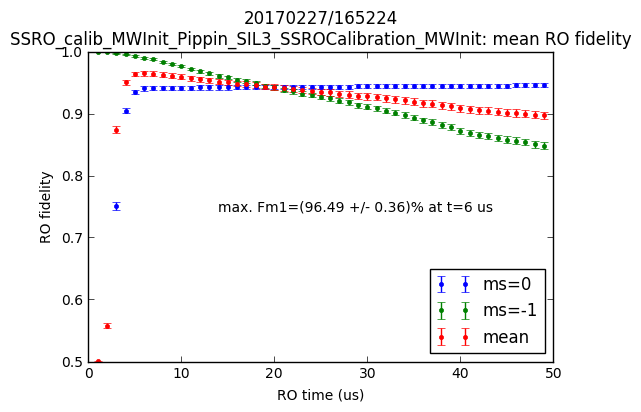

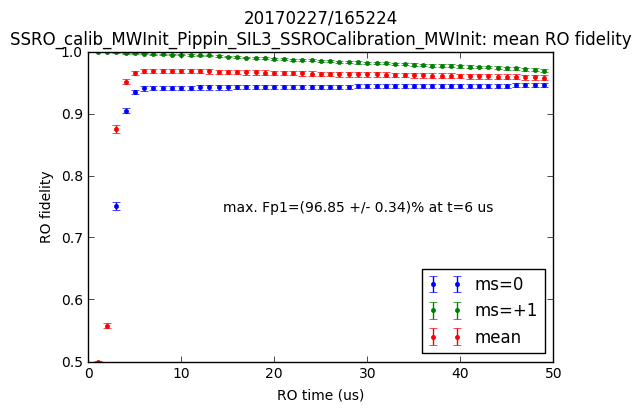

In [148]:
reload(ssro)
ssro.ssrocalib_MWInit(folder = cpld_hahn_ssro_folder, plot_photon_ms0=False)

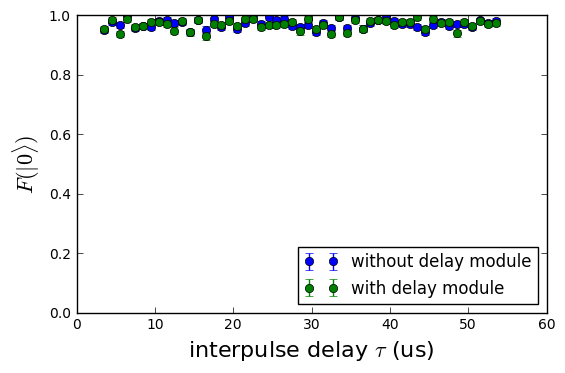

In [182]:
# zero-trigger
a1 = sequence.SequenceAnalysis(cpld_hahn_0t_data_folder)
a1.get_sweep_pts()
a1.get_readout_results(name='ssro')
a1.get_electron_ROC(ssro_calib_folder = cpld_hahn_ssro_folder)

# Plot data
ax = a1.plot_result_vs_sweepparam(ret='ax', name='ssro', label="without delay module")

# two-trigger
a2 = sequence.SequenceAnalysis(cpld_hahn_2t_data_folder)
a2.get_sweep_pts()
a2.get_readout_results(name='ssro')
a2.get_electron_ROC(ssro_calib_folder = cpld_hahn_ssro_folder)

# Plot data
a2.plot_result_vs_sweepparam(ax=ax, name='ssro', label="with delay module")

plt.ylim(0.0, 1.0)
plt.ylabel(r"$F(|0\rangle)$", fontsize=16)
plt.xlabel(r"interpulse delay $\tau$ (us)", fontsize=16)
plt.title("")

plt.legend(loc=4)

savefig("cpld-fixed-delay-hahn-echo")

# Variable delay Hahn echo

In [158]:
vardelay_hahn_ssro_folder = os.path.join(data_root, "20170328", "175000_AdwinSSRO_SSROCalibration_111no2_SIL2")
vardelay_hahn_0t_data_folder = os.path.join(data_root, "20170328", "181534_ElectronRefocussingTriggered_VariableDelay_HahnEcho_0T_111no2_SIL2")
vardelay_hahn_2t_data_folder = os.path.join(data_root, "20170328", "181953_ElectronRefocussingTriggered_VariableDelay_HahnEcho_2T_111no2_SIL2")

SSRO calibration :  20170328/175000
max. F = (96.34 +/- 0.37)% at t=9 us
	ms_0 = (94.86 +/- 0.31)%
	ms_1 = (97.82 +/- 0.21)%


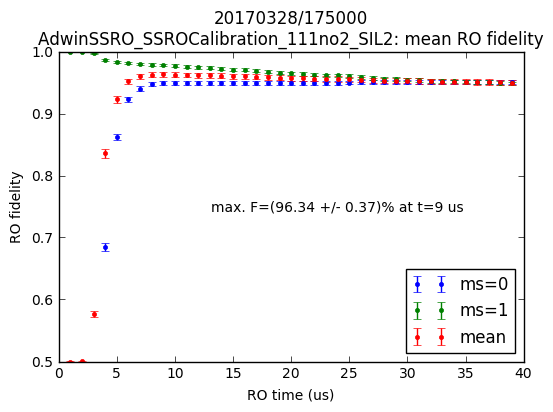

In [159]:
reload(ssro)
ssro.ssrocalib(folder = vardelay_hahn_ssro_folder, plot_photon_ms0=False)

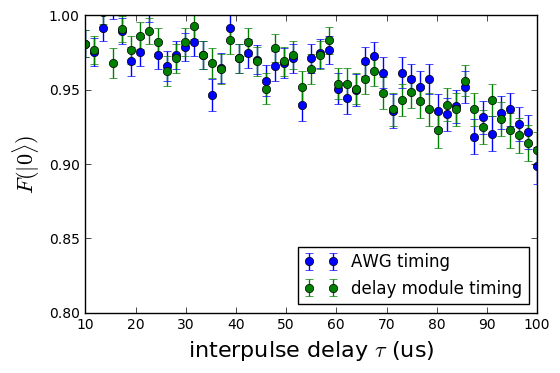

In [190]:
# zero-trigger
a1 = sequence.SequenceAnalysis(vardelay_hahn_0t_data_folder)
a1.get_sweep_pts()
a1.get_readout_results(name='ssro')
a1.get_electron_ROC(ssro_calib_folder = vardelay_hahn_ssro_folder)

# Plot data
ax = a1.plot_result_vs_sweepparam(ret='ax', name='ssro', label="AWG timing")

# two-trigger
a2 = sequence.SequenceAnalysis(vardelay_hahn_2t_data_folder)
a2.get_sweep_pts()
a2.get_readout_results(name='ssro')
a2.get_electron_ROC(ssro_calib_folder = vardelay_hahn_ssro_folder)

# Plot data
a2.plot_result_vs_sweepparam(ax=ax, name='ssro', label="delay module timing")

plt.ylim(0.8, 1.0)
plt.ylabel(r"$F(|0\rangle)$", fontsize=16)
plt.xlabel(r"interpulse delay $\tau$ (us)", fontsize=16)
plt.title("")

plt.legend(loc=4)
plt.gcf().set_size_inches(6,4)

savefig("variable-delay-short-hahn-echo")